# Logistic Classification

---
## Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sb.set()
plt.style.use('seaborn-v0_8-bright')
plt.rcParams['figure.dpi'] = 300

---
## Helper Functions

In [2]:
def prepare_data(df):
    return df.iloc[:, :-1], df.iloc[:, -1]


def train_model(XTrain, yTrain, XTest, yTest):
    model = xgb.XGBClassifier(objective = 'binary:logistic', verbosity = 0, silent = True, seed = 20)
    model.set_params(early_stopping_rounds = 10, eval_metric = 'auc')
    model.fit(XTrain, yTrain, eval_set = [(XTest, yTest)], verbose = 0)
    return model


def create_matrix(table, info, axes):
    labels = ['Not Good', 'Good']
    ls = []
    cm = confusion_matrix(info['actual'], info['predicted'])
    sb.heatmap(cm,
               annot = True,
               fmt = ".0f",
               annot_kws = {"size": 18},
               xticklabels = labels,
               yticklabels = labels,
               ax = axes)
    
    accuracy = np.trace(cm) / np.sum(cm)
    error = (cm[0,1] + cm[1,0]) / np.sum(cm)

    try:
        sensitivity = cm[1,1] / sum(cm[1,:])
    except:
        sensitivity = 0
    
    try:
        specificity = cm[0,0] / sum(cm[0,:])
    except:
        specificity = 0

    try:
        precision = cm[1,1] / sum(cm[:,1])
    except:
        precision = 0
    
    try:
        f1_score  = 2 *precision * sensitivity / (precision + sensitivity)
    except:
        f1_score = 0
        
    statusText = (f"\n\nAccuracy = {accuracy:.2f}"
                  f"\nError = {error:.2f}"
                  f"\nSensitivity (TPR) = {sensitivity:.2f}"
                  f"\nSpecificity (TNR) = {specificity:.2f}"
                  f"\nPrecision (PPV) = {precision:.2f}"
                  f"\nF1 Score = {f1_score:.2f}")
    axes.set_xlabel('Predicted' + statusText)
    axes.set_ylabel('Actual')
    axes.set_title(info['title'])
    
    ls.append(accuracy)
    ls.append(error)
    ls.append(sensitivity)
    ls.append(specificity)
    ls.append(precision)
    ls.append(f1_score)
    ls = pd.DataFrame(ls)
    table = pd.concat([table, ls], axis = 1)
    return table


def visualise_prediction(table, trainInfo, testInfo, title):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
    create_matrix(table, trainInfo, ax1)
    table = create_matrix(table, testInfo, ax2)
    plt.suptitle(title, fontsize = 24)
    plt.show()
    return table
    

def visualise_performance(df):
    f, axes = plt.subplots(3, 2, figsize = (12, 12))
    plt.suptitle('Performance', fontsize = 24)
    plt.ylim([0,1])
    i = j = 0
    for row in df.index:
        subplot = sb.barplot(x = df.columns,
                            y = df.loc[row],
                            ax = axes[i][j])
        for p in subplot.patches:
            subplot.annotate(f'{p.get_height():.2f}',
                            (p.get_x() + p.get_width() / 2, p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, -12), 
                            textcoords = 'offset points')
        
        if (j < 1):
            j += 1
        else:
            j = 0
            i += 1 
        
    plt.show()

---
## Import Data

In [3]:
testDf = pd.read_csv('datasets/test.csv', index_col = 0)
trainDf = pd.read_csv('datasets/train.csv', index_col = 0)
oversampledTrainDf = pd.read_csv('datasets/oversampled_train.csv', index_col = 0)
smoteennTrainDf = pd.read_csv('datasets/smoteenn_train.csv', index_col = 0)
smotetomekTrainDf = pd.read_csv('datasets/smotetomek_train.csv', index_col = 0)

XTest, yTest = prepare_data(testDf)

In [4]:
performance = pd.DataFrame()

---
## Model Training

---
### 1. Original Train Data

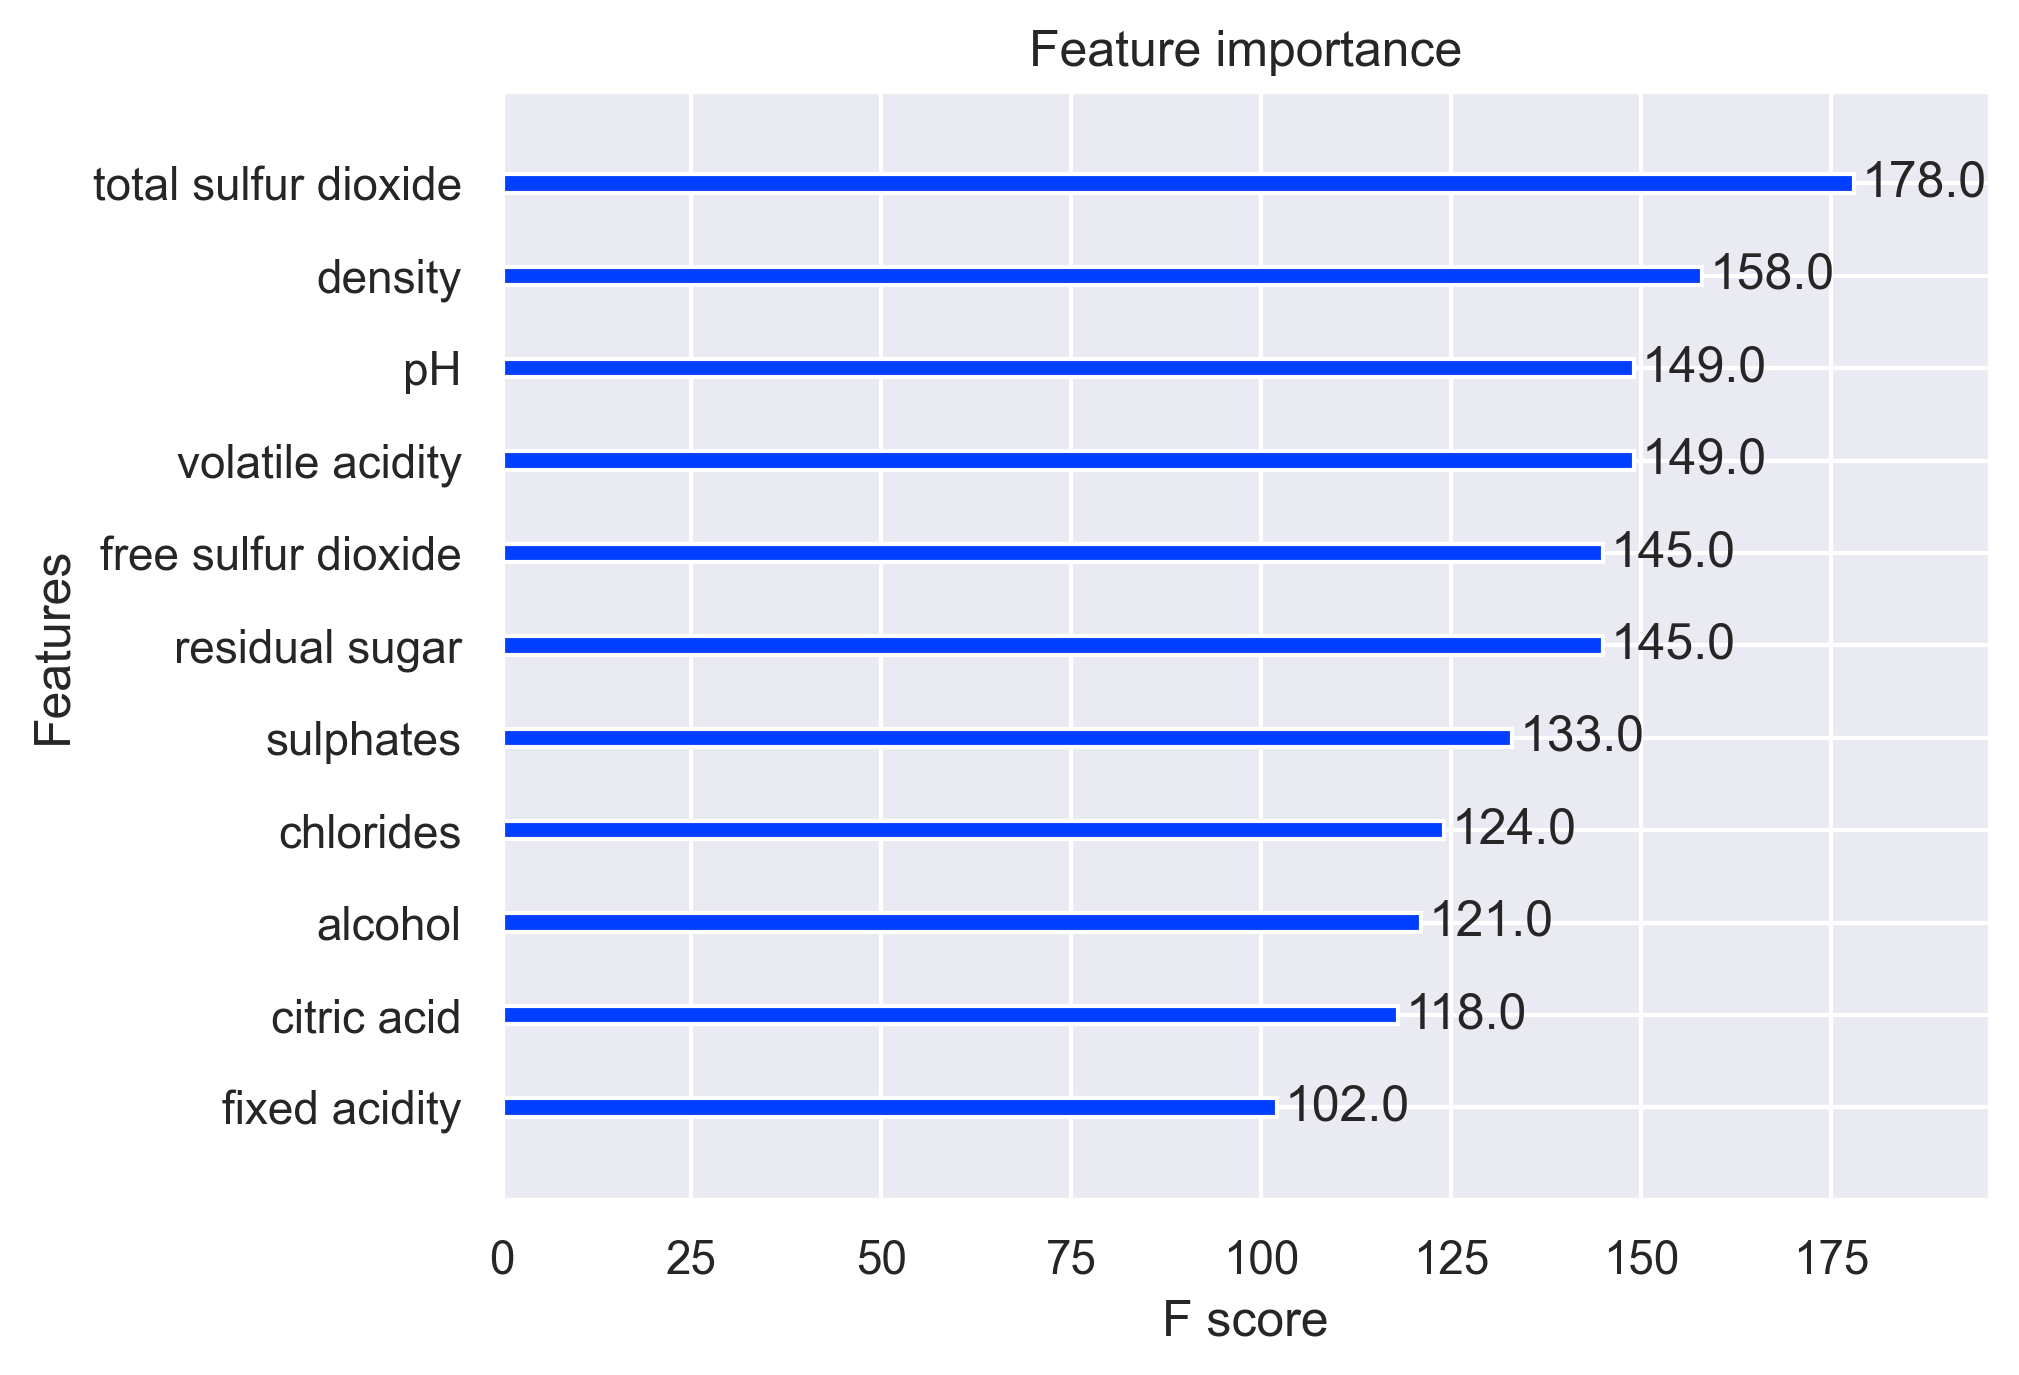

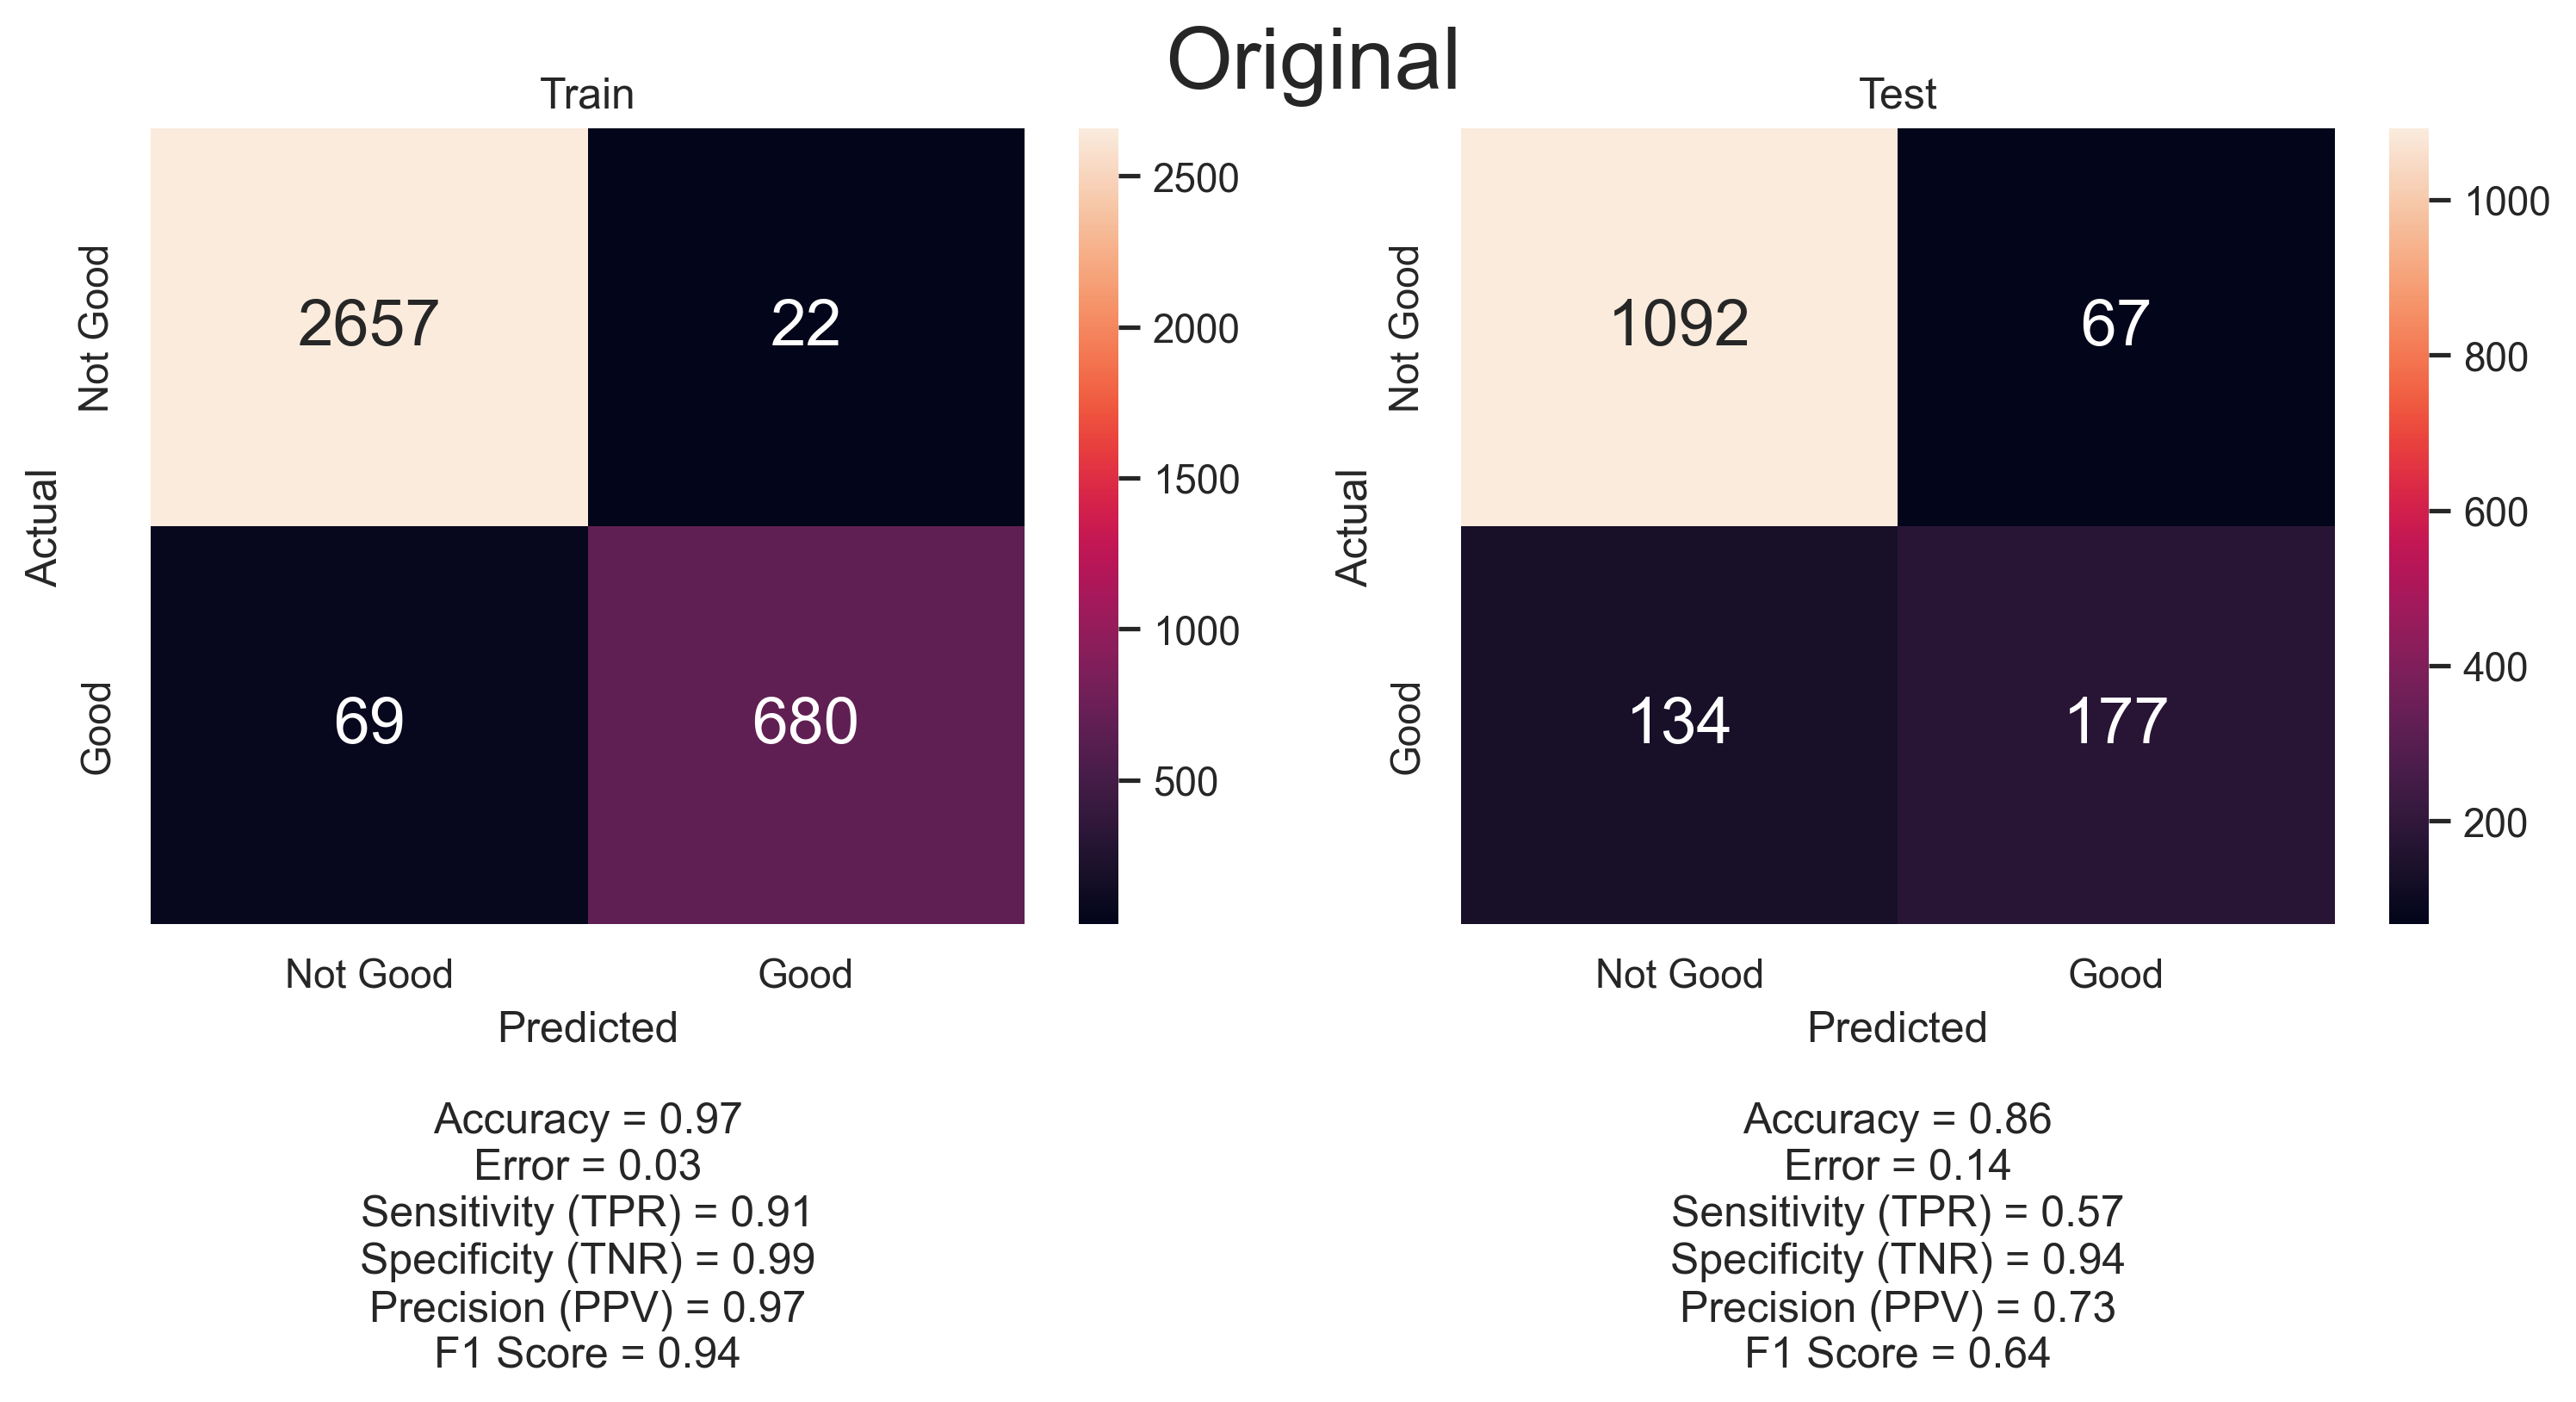

In [5]:
XTrain, yTrain = prepare_data(trainDf)
model = train_model(XTrain, yTrain, XTest, yTest)

xgb.plot_importance(model)
yTrainPred = model.predict(XTrain)
yTestPred = model.predict(XTest)
trainInfo = {'actual': yTrain, 'predicted': yTrainPred, 'title': 'Train'}
testInfo = {'actual': yTest, 'predicted': yTestPred, 'title': 'Test'}
performance = visualise_prediction(performance, trainInfo, testInfo, 'Original')

---
### 2. Oversampled Train Data

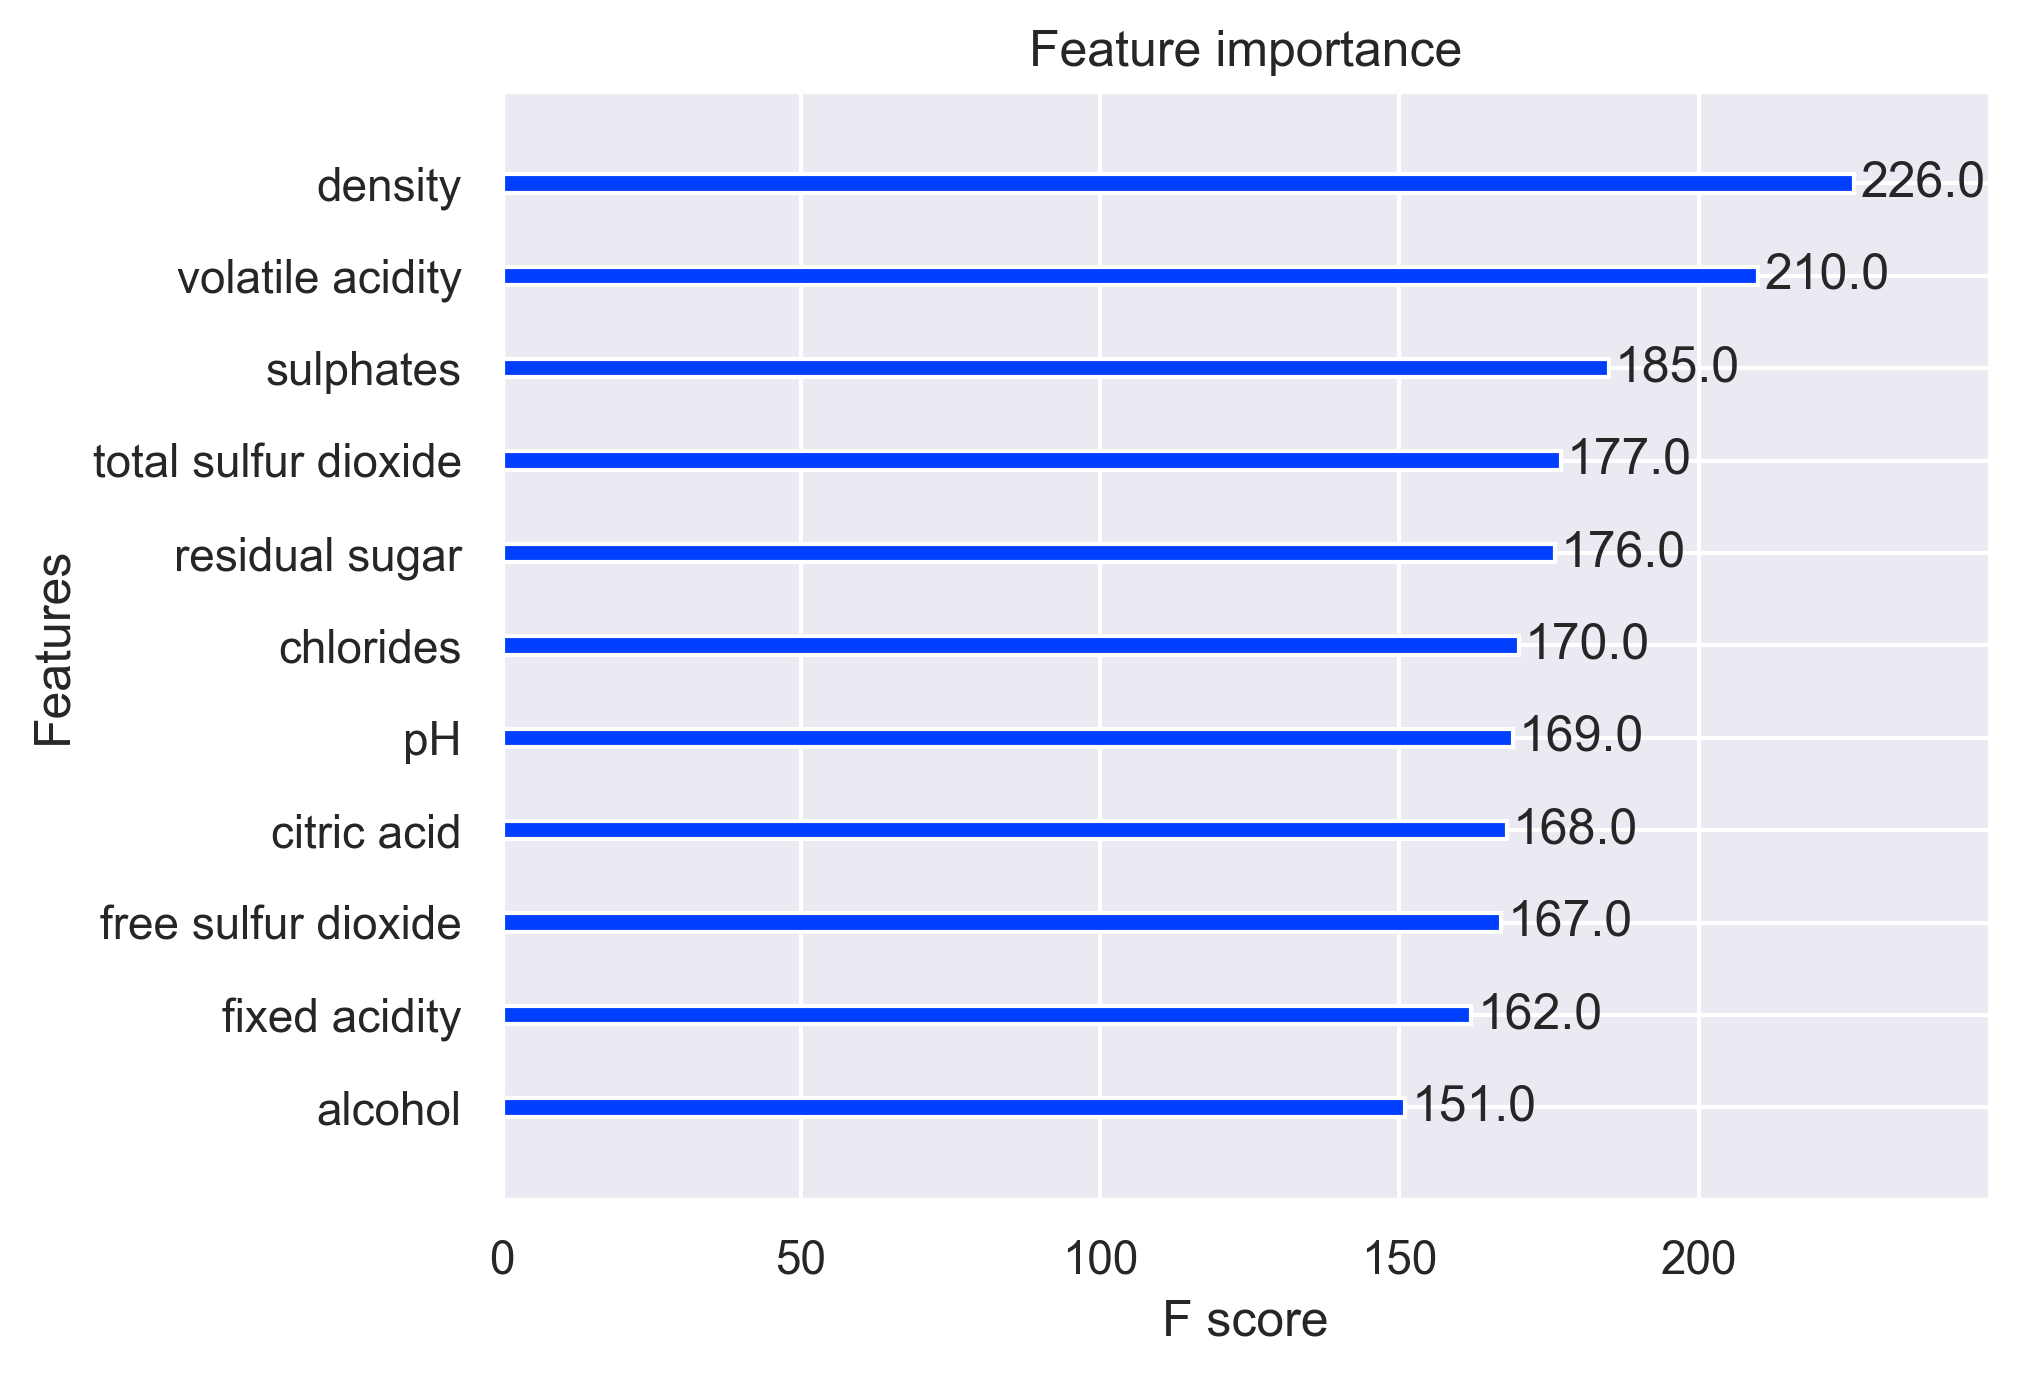

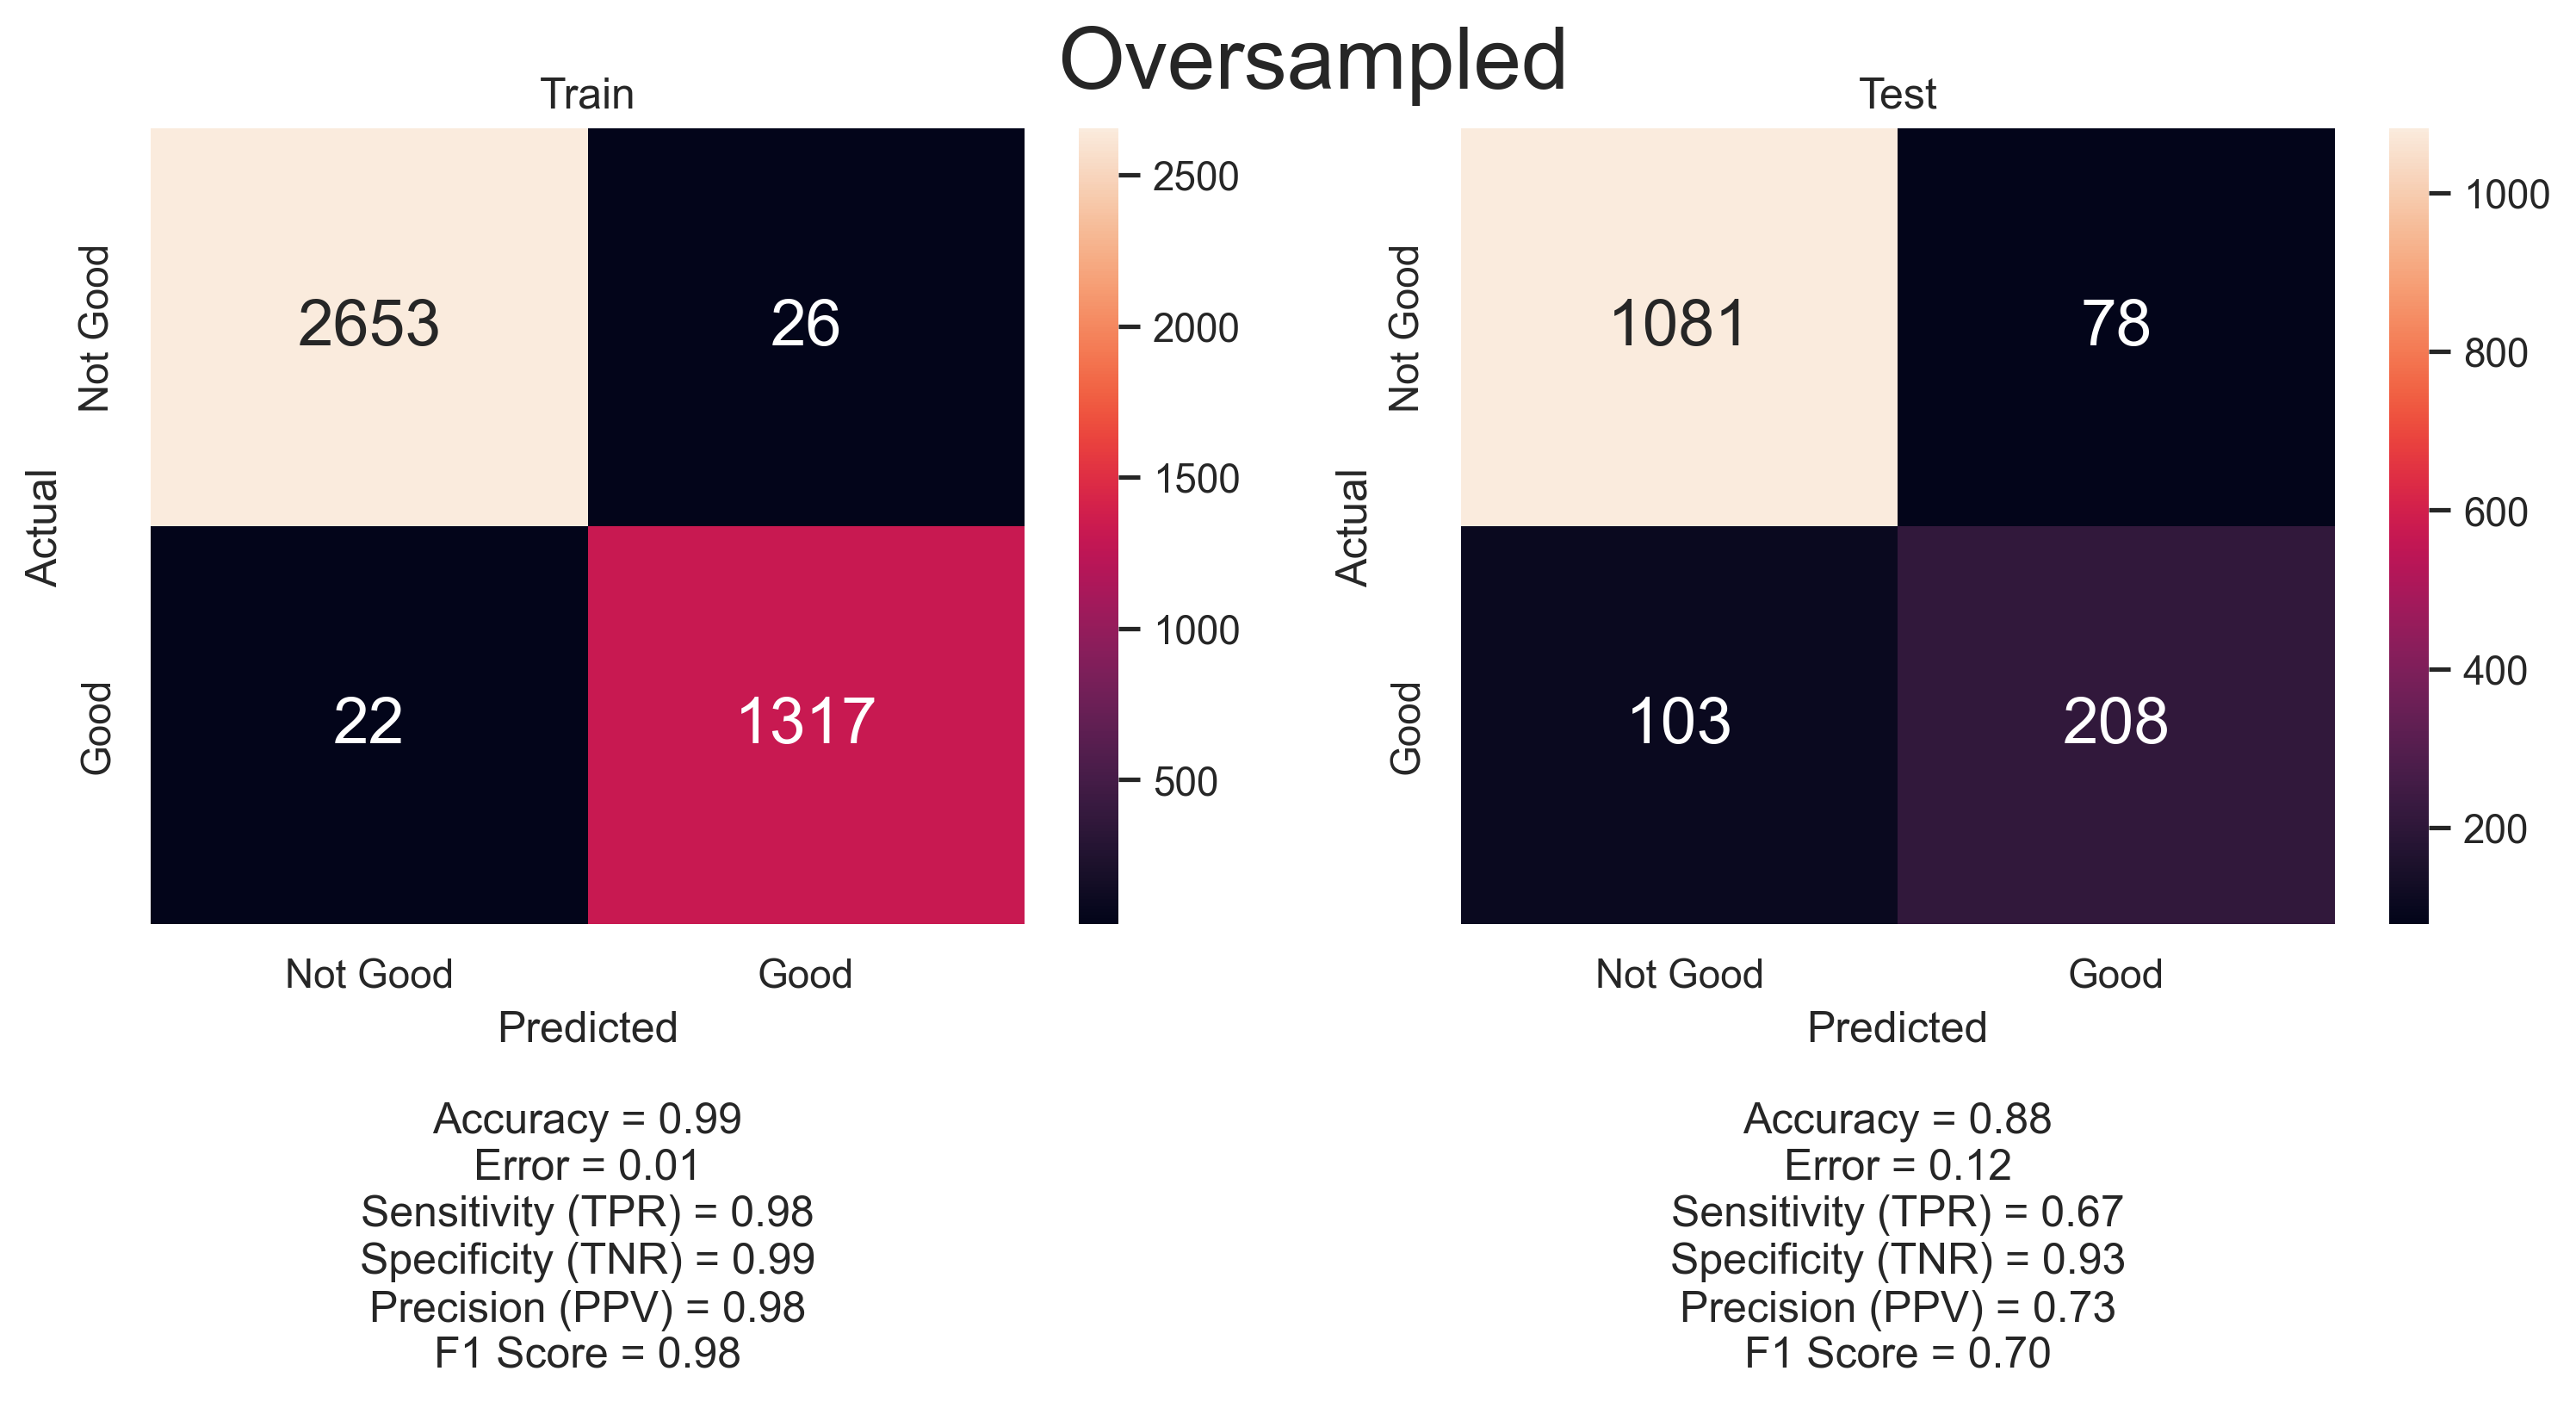

In [6]:
XTrain, yTrain = prepare_data(oversampledTrainDf)
model = train_model(XTrain, yTrain, XTest, yTest)

xgb.plot_importance(model)
yTrainPred = model.predict(XTrain)
yTestPred = model.predict(XTest)
trainInfo = {'actual': yTrain, 'predicted': yTrainPred, 'title': 'Train'}
testInfo = {'actual': yTest, 'predicted': yTestPred, 'title': 'Test'}
performance = visualise_prediction(performance, trainInfo, testInfo, 'Oversampled')

---
### 3. SMOTEENN Train Data

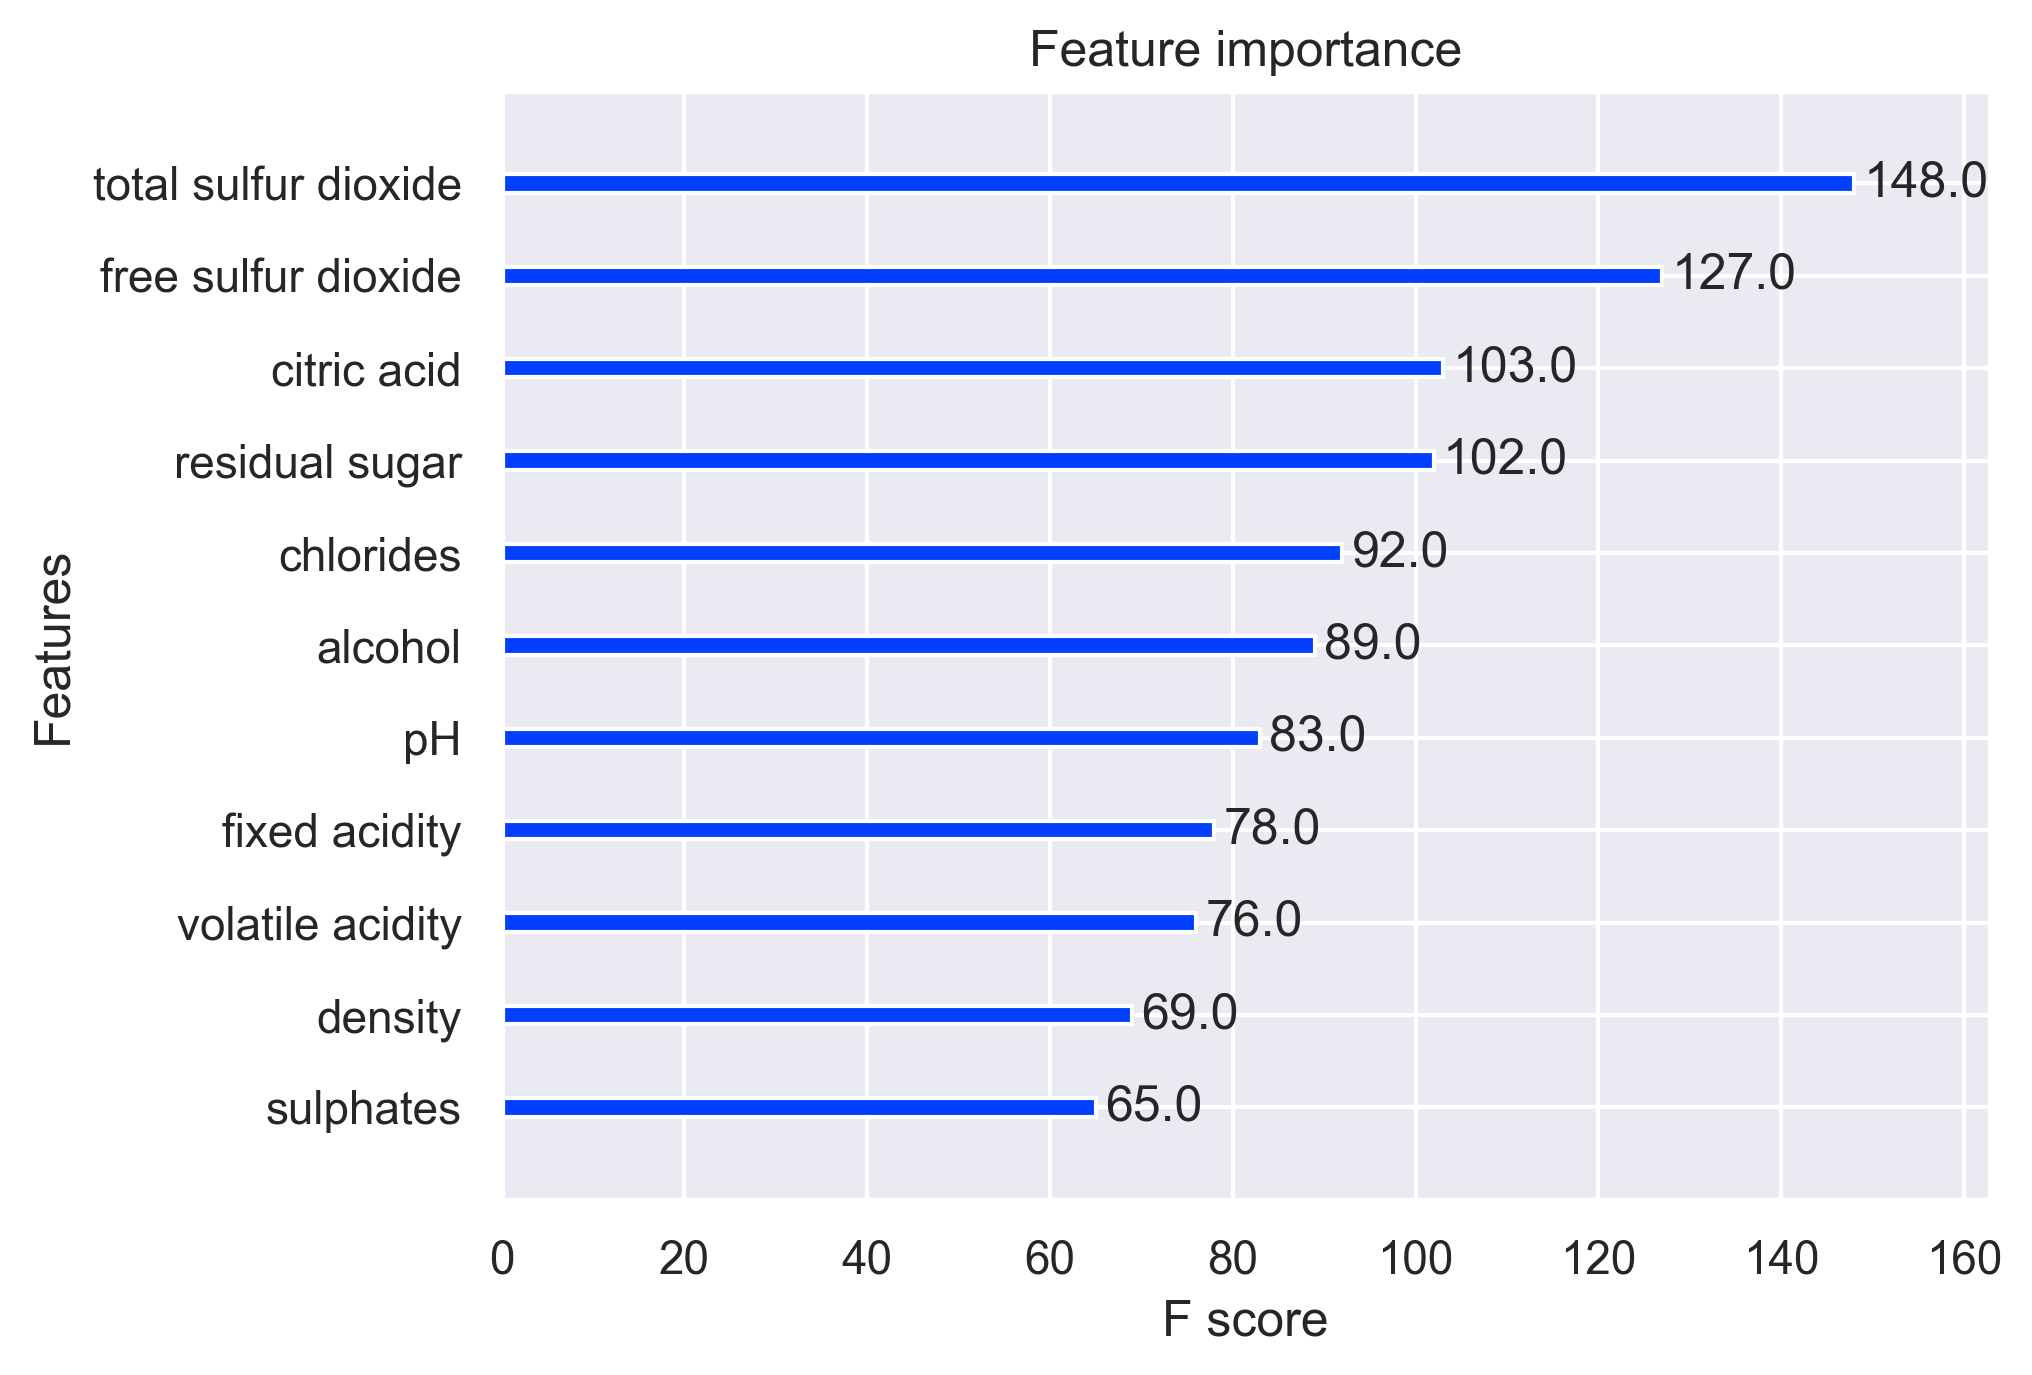

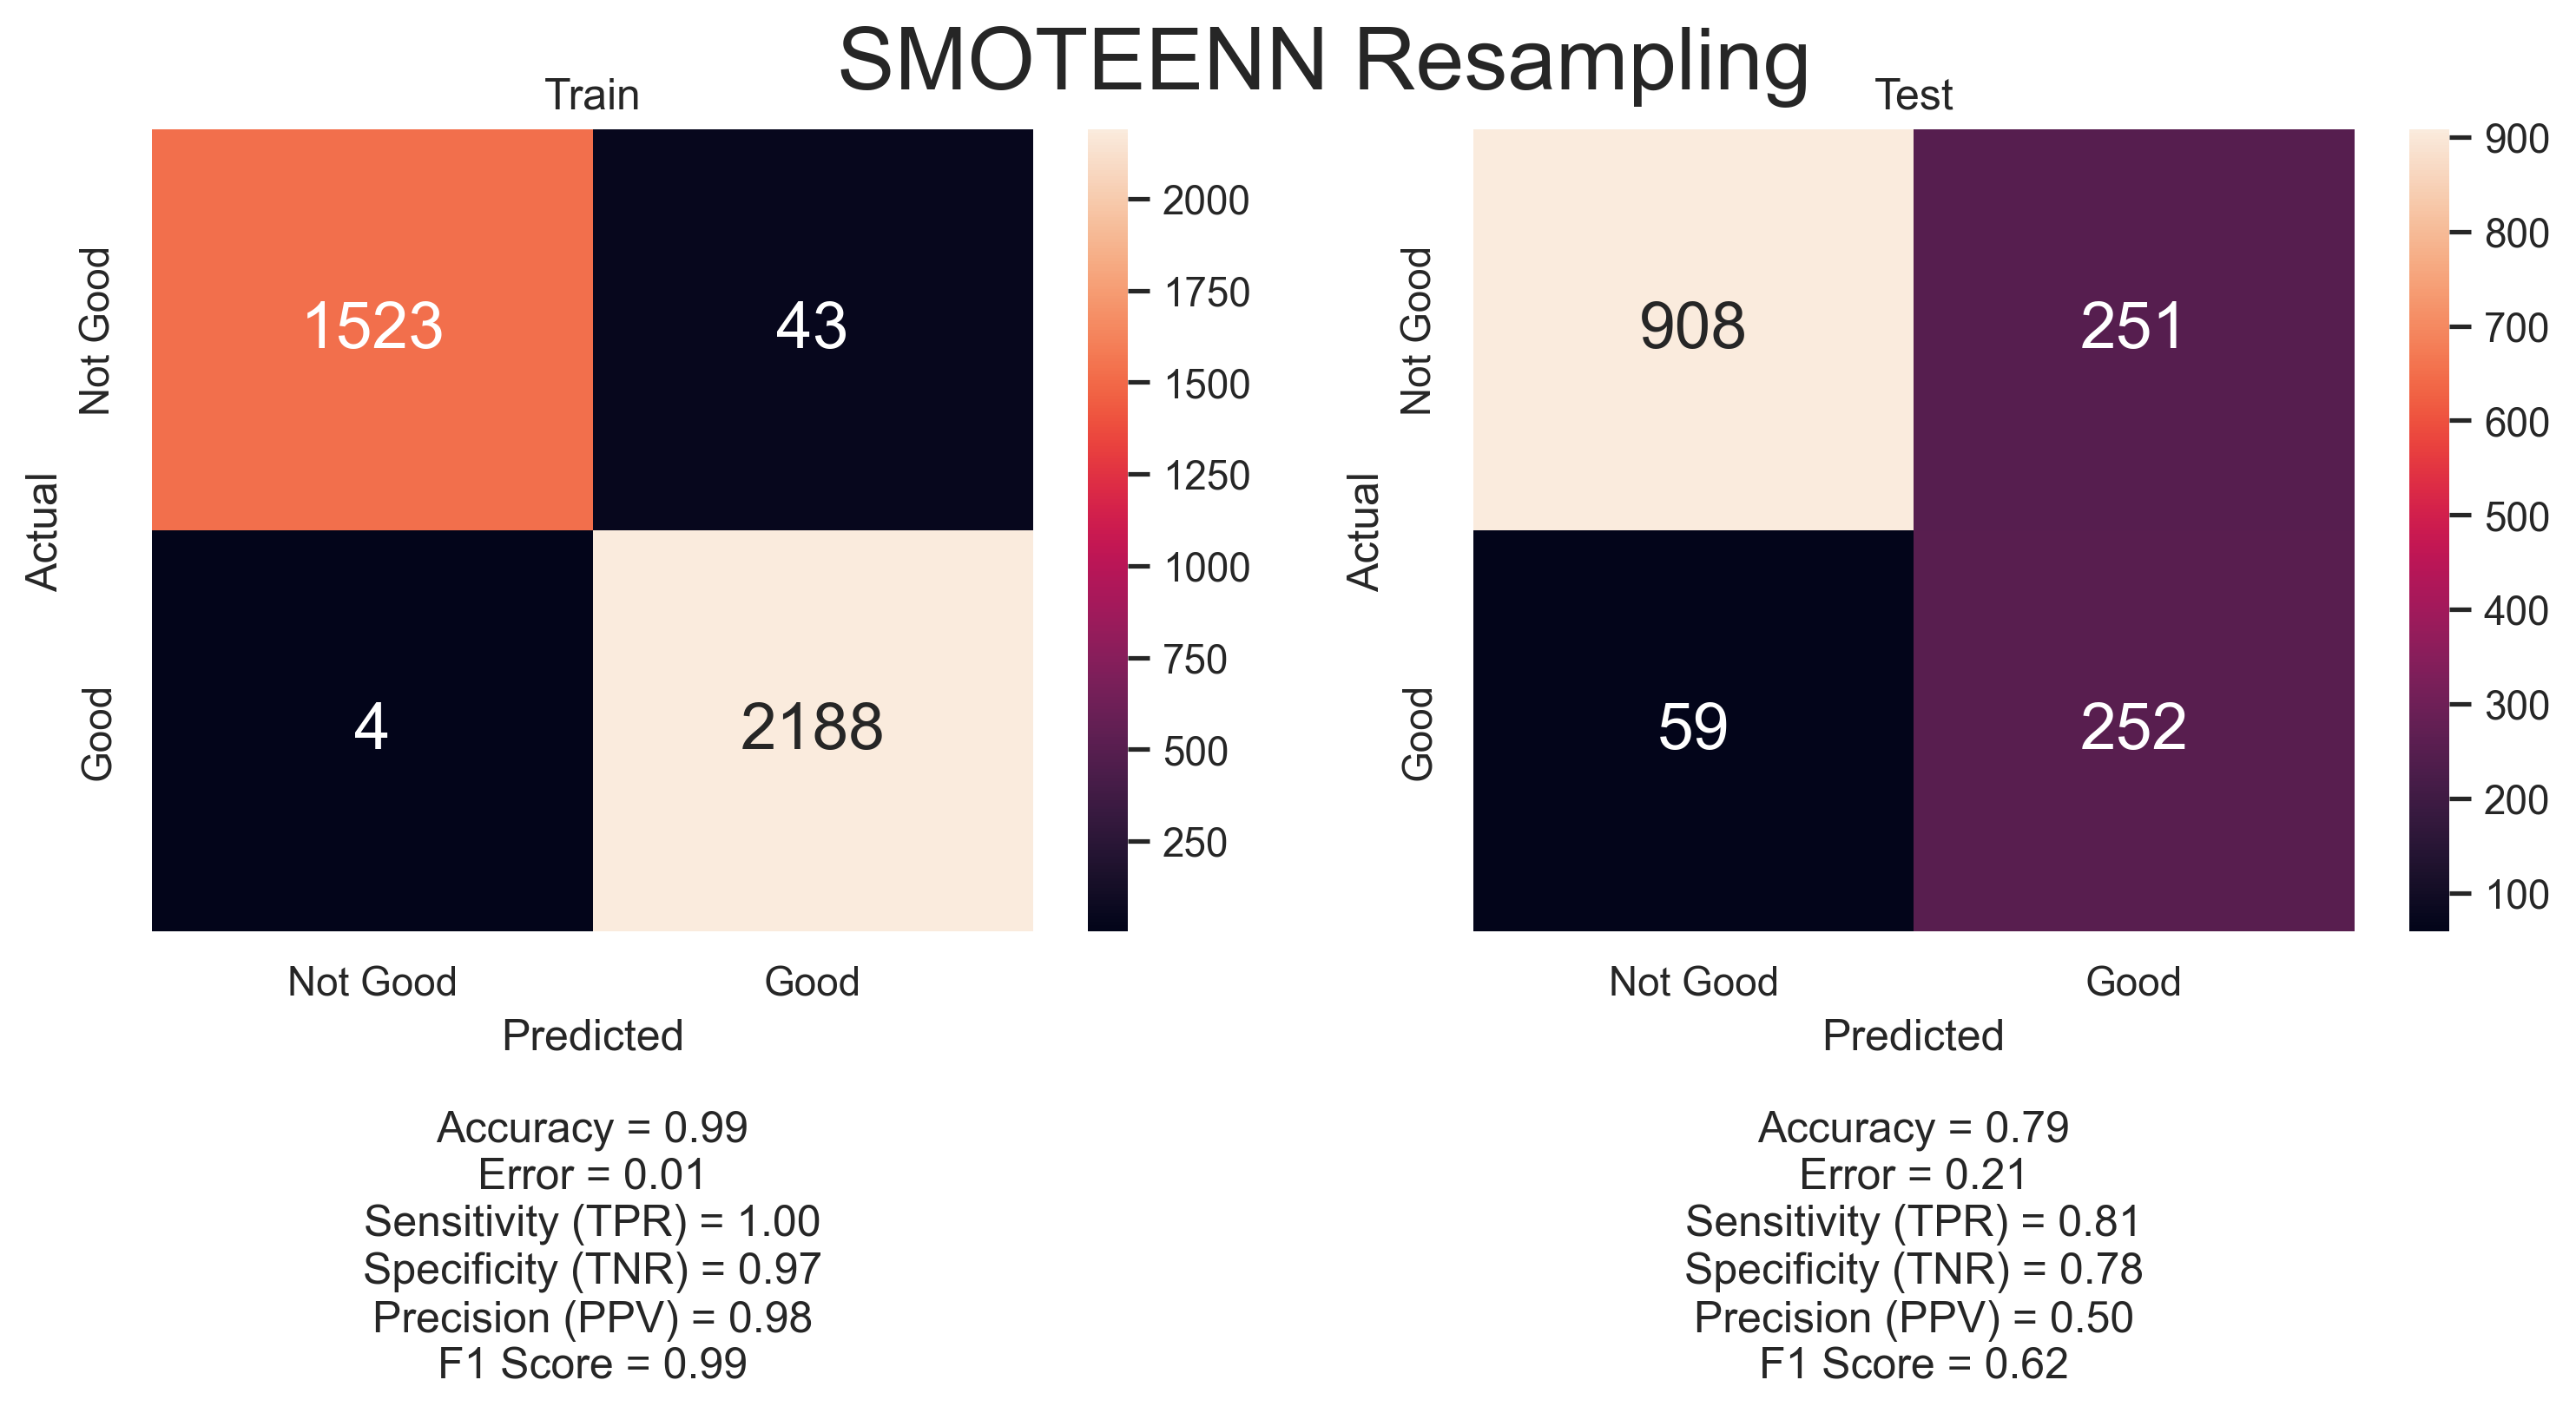

In [7]:
XTrain, yTrain = prepare_data(smoteennTrainDf)
model = train_model(XTrain, yTrain, XTest, yTest)

xgb.plot_importance(model)
yTrainPred = model.predict(XTrain)
yTestPred = model.predict(XTest)
trainInfo = {'actual': yTrain, 'predicted': yTrainPred, 'title': 'Train'}
testInfo = {'actual': yTest, 'predicted': yTestPred, 'title': 'Test'}
performance = visualise_prediction(performance, trainInfo, testInfo, 'SMOTEENN Resampling')

---
### 4. SMOTETomek Train Data

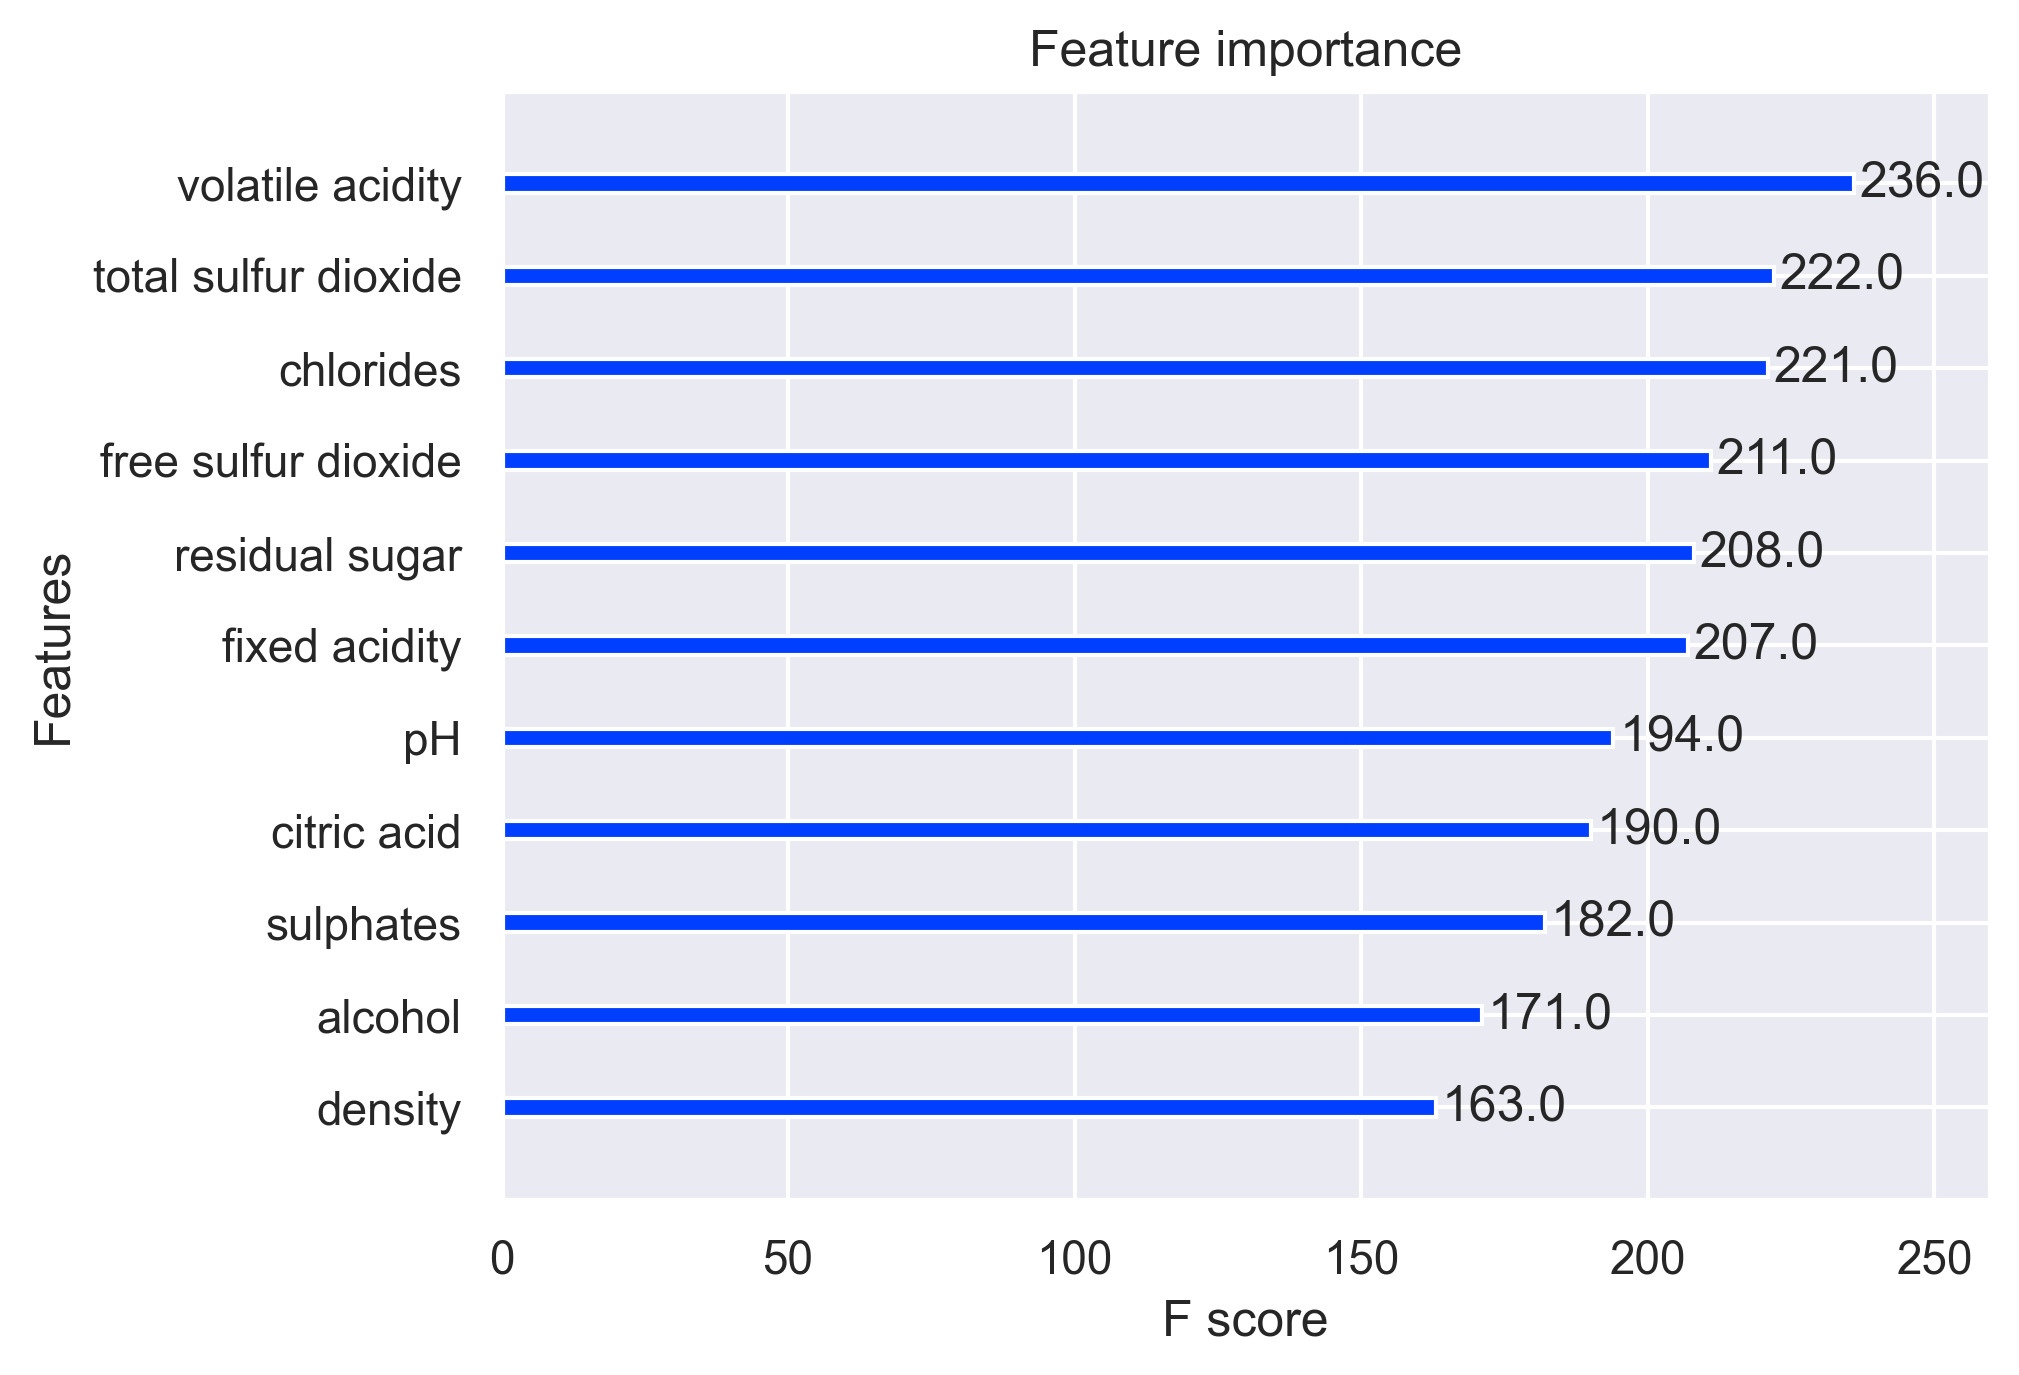

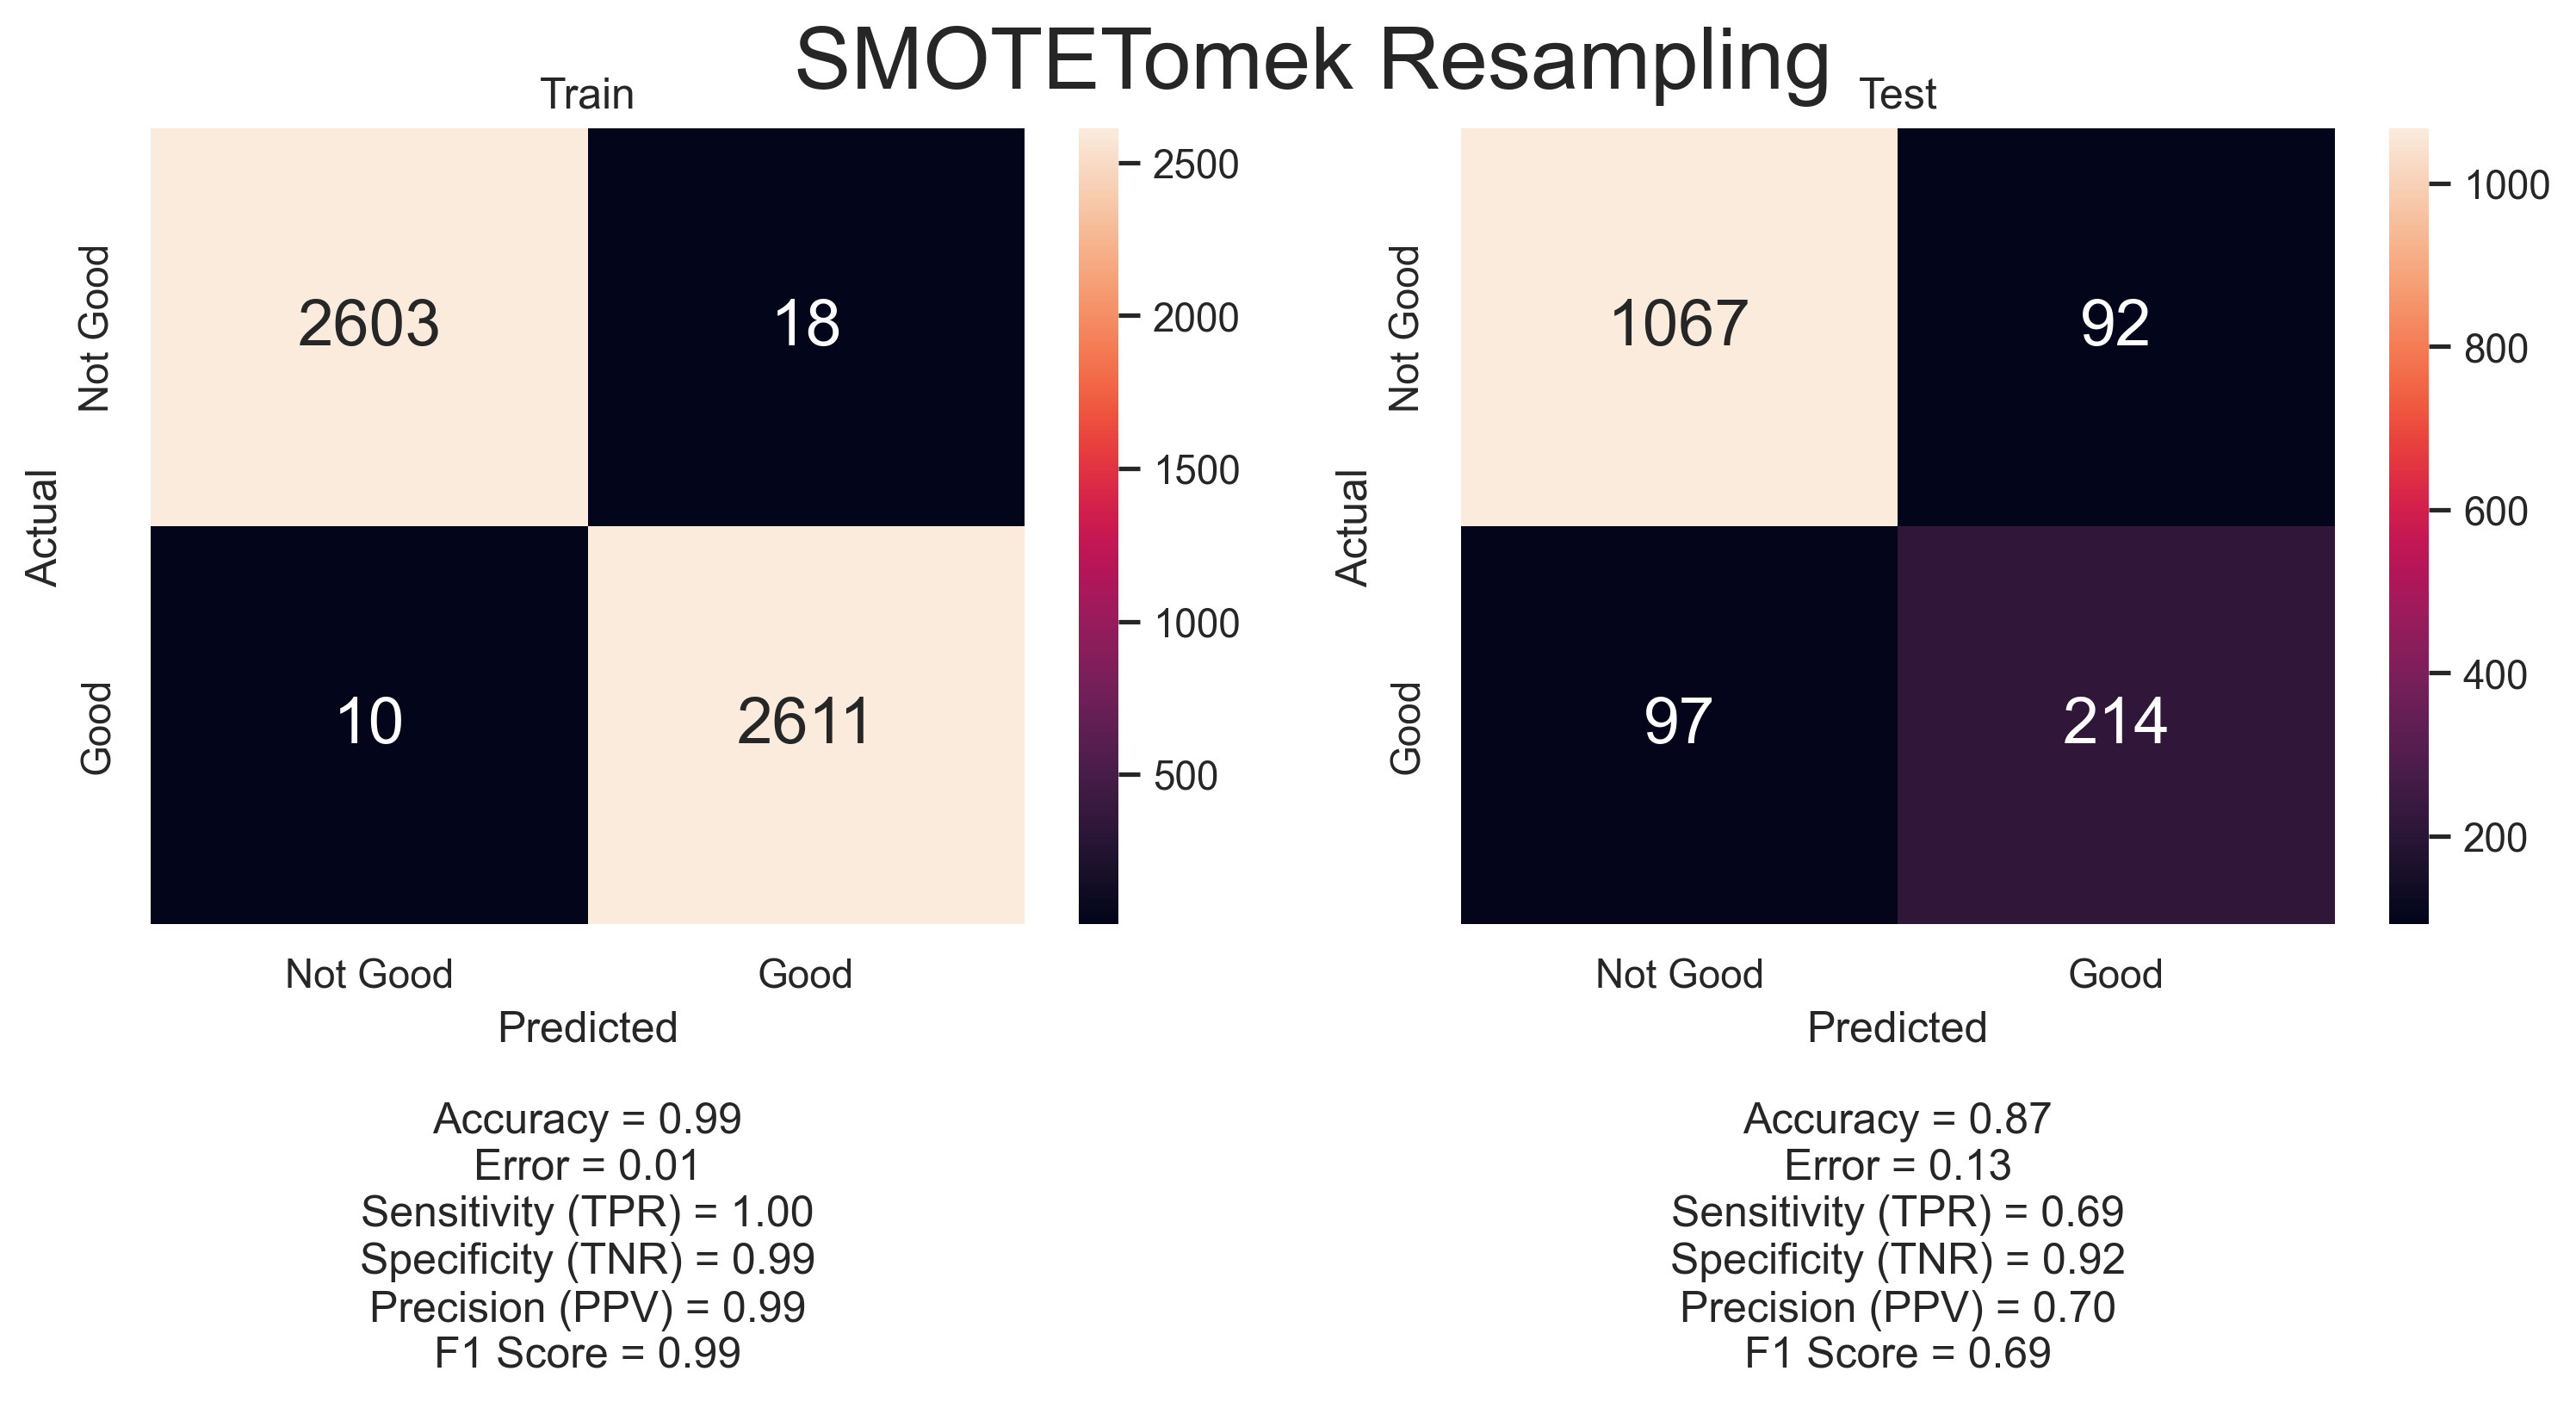

In [8]:
XTrain, yTrain = prepare_data(smotetomekTrainDf)
model = train_model(XTrain, yTrain, XTest, yTest)

xgb.plot_importance(model)
yTrainPred = model.predict(XTrain)
yTestPred = model.predict(XTest)
trainInfo = {'actual': yTrain, 'predicted': yTrainPred, 'title': 'Train'}
testInfo = {'actual': yTest, 'predicted': yTestPred, 'title': 'Test'}
performance = visualise_prediction(performance, trainInfo, testInfo, 'SMOTETomek Resampling')

---
## Performance Visualisation

In [9]:
performance = performance.set_axis(['Original','Oversampling','SMOTEENN','SMOTETomek'],axis = 1)
performance = performance.set_axis(['Accuracy', 'Error', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score'],axis = 0)
performance

,Original,Oversampling,SMOTEENN,SMOTETomek
Accuracy,0.863265,0.876871,0.789116,0.871429
Error,0.136735,0.123129,0.210884,0.128571
Sensitivity,0.569132,0.668810,0.810289,0.688103
Specificity,0.942192,0.932701,0.783434,0.920621
Precision,0.725410,0.727273,0.500994,0.699346
F1 Score,0.637838,0.696817,0.619165,0.693679


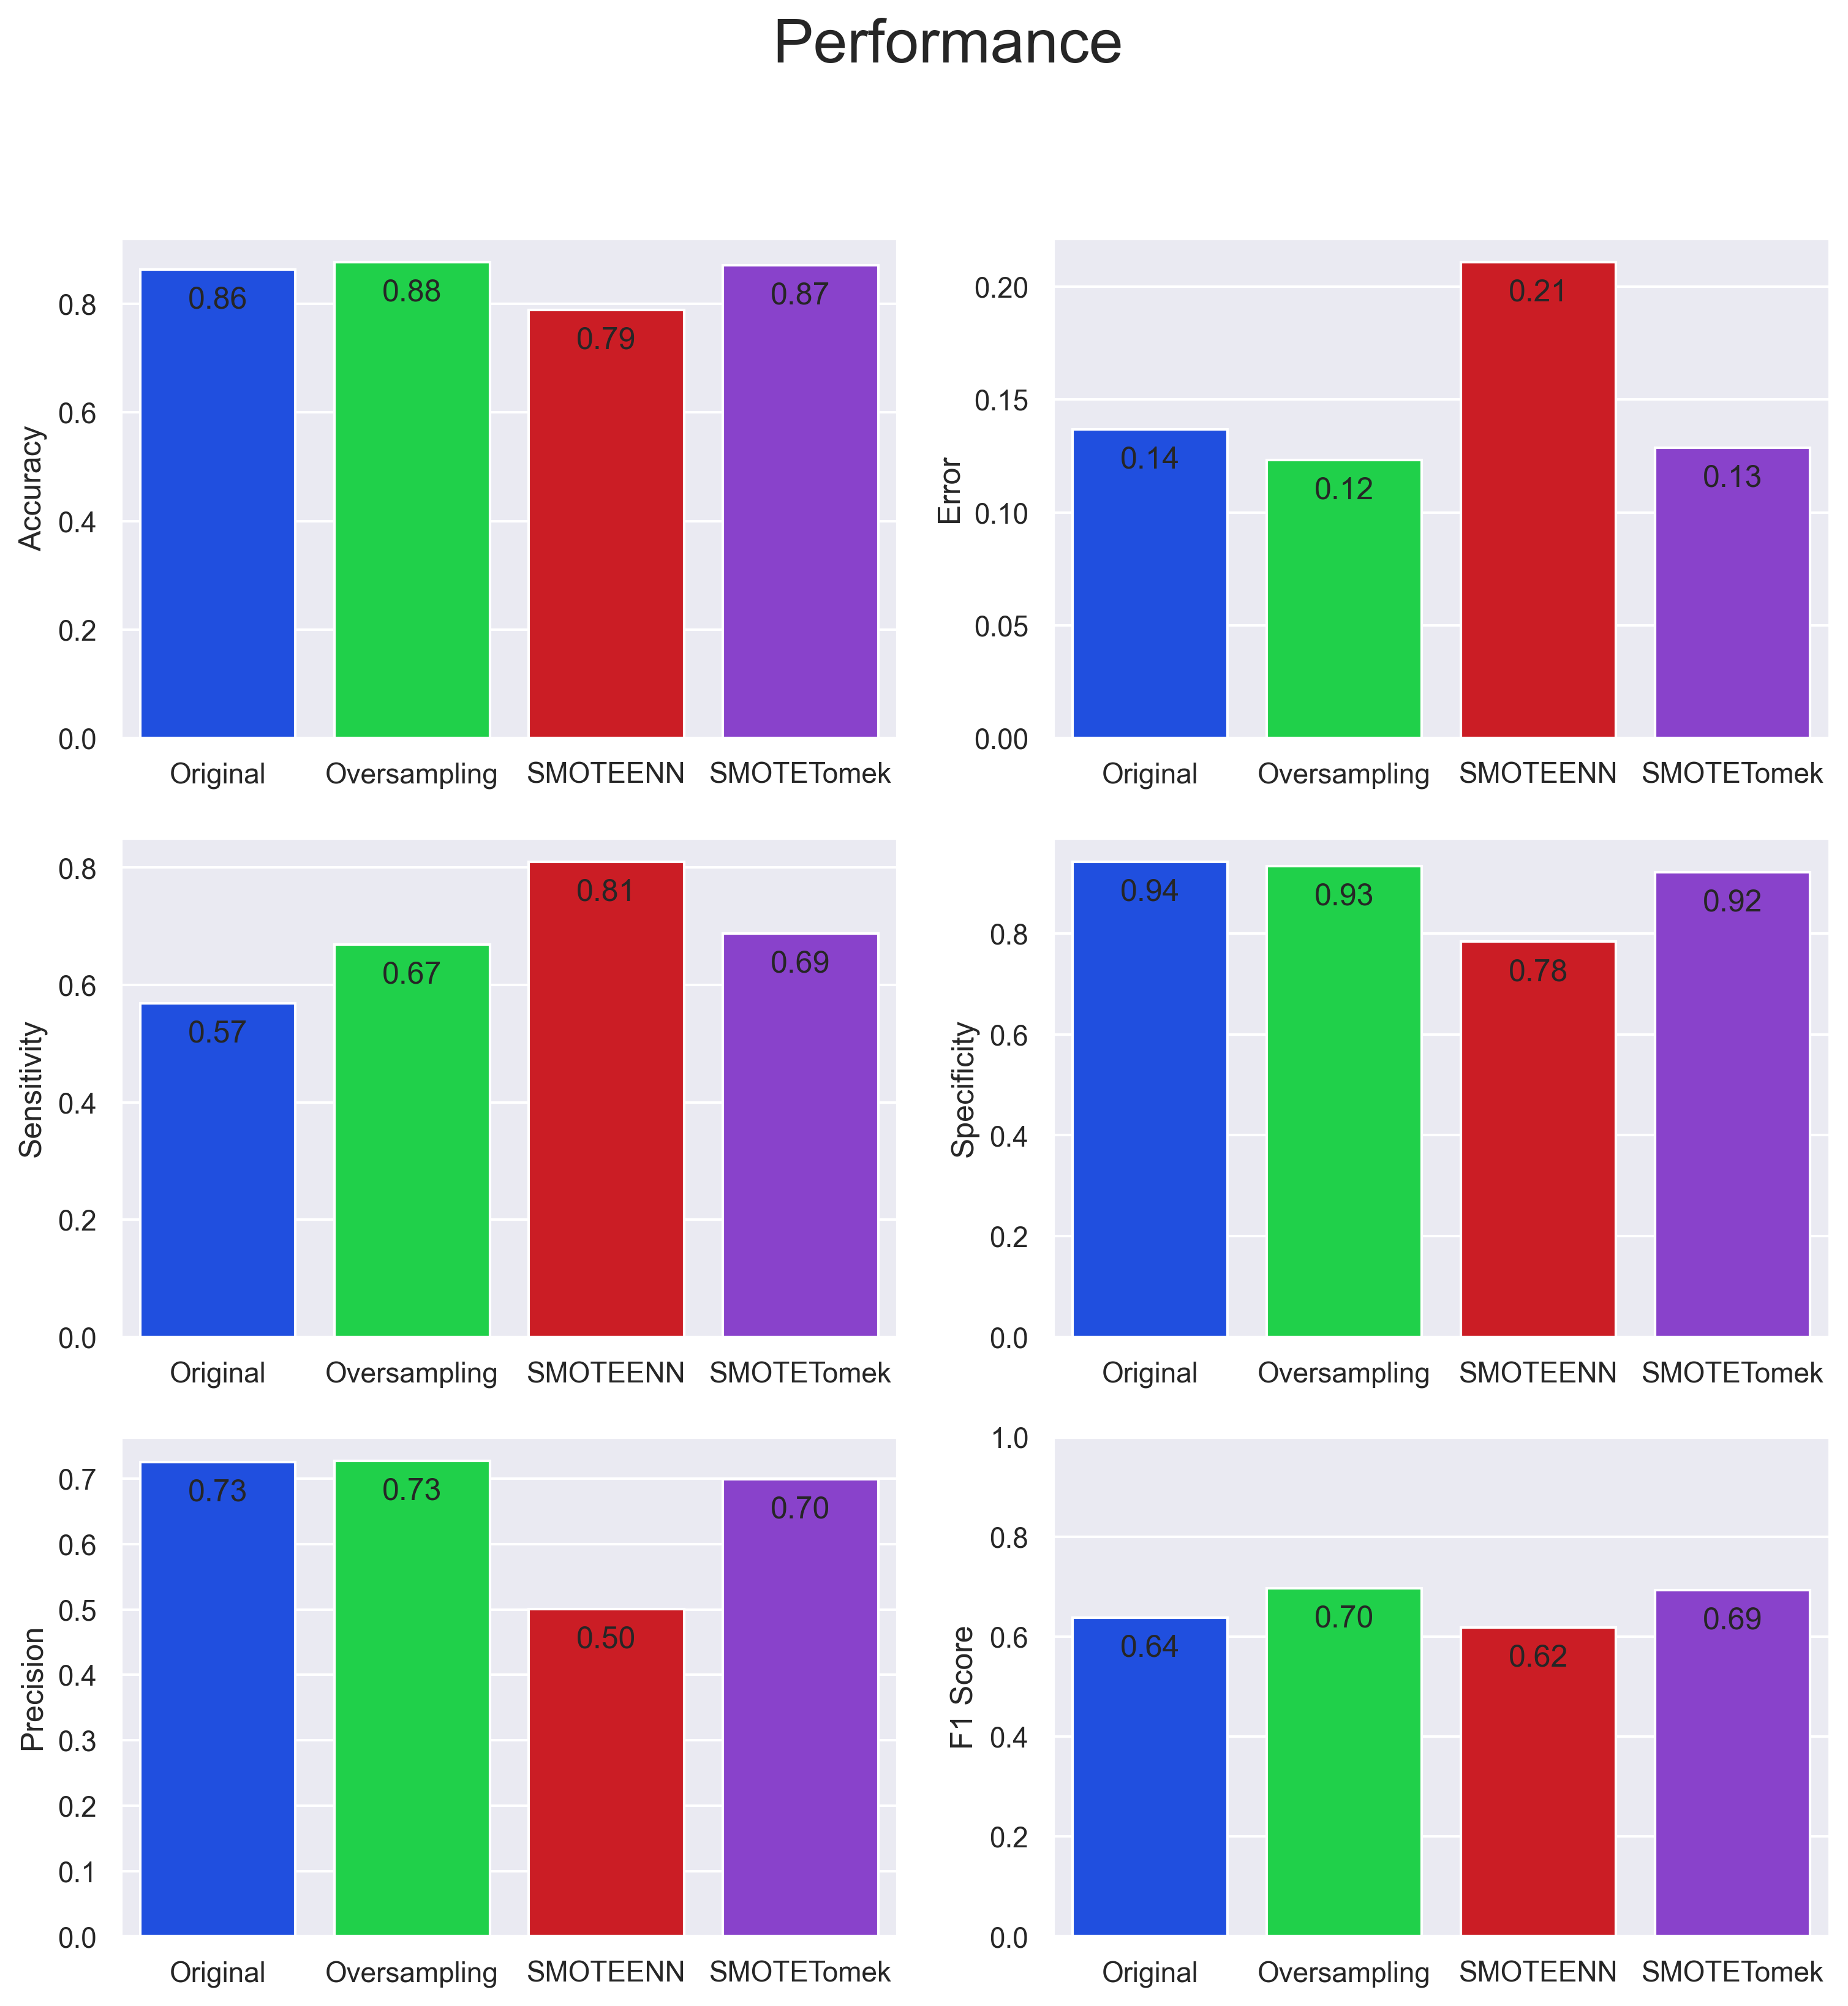

In [10]:
visualise_performance(performance)